# SI 370 - Homework 2: Pandas Hands-on Experience

## Please fill in...
### * Alexander "AJ" Goldstein 
### * People you worked with: N/A

**Objectives:**

This week, we want to get some hands-on experience with Pandas operations including:
- basic data loading
- selection by various ways (including various string matches)
- plotting (but mostly to validate selections)
- basic aggregations (value_counts)
- groupby/stack
- basic indexing/joins
- creation and modification of columns (including string modification)

Our main purpose is to review what we have already covered in the class and try the same analysis on other datasets.

<h3><font color='red'>Hint: Many of these problems are very close to what we worked through in in previous labs.  Only the data have been changed. If you're stuck, review your previous work.</font></H3>

## **Submission Instructions:**
After completing this homework, you should turn in two files via Canvas:
1. A Jupyter Notebook file named hw2-YOUR_UNIQUE_NAME.ipynb.  Please observe the following requirements:
    * This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code.
    * You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions. Do not include such content unless required.
    * Irrelevant code and results should be deleted prior to submission.
2. An html file named hw2-YOUR_UNIQUE_NAME.html showing the preview of the above Jupyter Notebook. To create this file, select File -> Download as HTML. We want this in case something breaks when we load your notebook.  This will let us see what you saw when you were done.

## 1. Setup Jupyter Environment
The configuration of Anaconda and Jupyter was covered in Lab 1 (the first day). We assume you have completed or reviewed all the required tasks in Lab 1 before attempting this homework.

We need to do the same setup as we had in lab 3. So just copy whatever library you imported in lab 3.

In [197]:
# load a few libraries we'll need

%matplotlib inline
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.patches as mpatches
from random import sample

Next, set up your Jupyter Notebook display to use the same css files as we used in lab 3. Note: You do not need to attach the css files to your assignment. We will use the same css files in the folder of your assignment and your code should work.

In [2]:
# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## 2. Slicing and Sorting

In lab 1, we used the names dataset and learned how to do basic statistical analysis and report the Summary Statistics. In this assignment, we want to return to the names dataset, but this time do more interesting analysis on it.  This will give you a bit more practice with series/dataframe selection.

For this purpose, we should first load the names dataset again.

In [4]:
df_1995 = pd.read_csv('names/yob1995.txt')
df_1995.head()

name gender  birth_count
0   Deziray      F            8
1     Nafis      M           11
2  Christan      F           52
3     Adeel      M            8
4    Nicolo      M           30

Answer the following questions using proper Pandas operations. Both your code and results should be included in your submitted Jupyter Notebook (same below). All the questions in this section involve **df_1995** only.

(a) What are the 10 most popular names in 1995?

Note that part f of question 3b in homework 1 asked us something similar. But now that we learned more about Pandas, we can answer it in a more efficient and easier way.

In [9]:
df_1995.sort_values('birth_count', ascending = False).head(10)

name gender  birth_count
25236      Michael      M        41403
7446       Matthew      M        32874
24365  Christopher      M        32668
16553        Jacob      M        31122
16986       Joshua      M        30715
16349     Nicholas      M        29156
22273        Tyler      M        29153
13046      Jessica      F        27938
23033      Brandon      M        26901
3026        Daniel      M        26702

(b) What are the 10 most popular boys' names in 1995?

In [10]:
df_1995[df_1995['gender'] == 'M'].sort_values('birth_count', ascending = False).head(10)

name gender  birth_count
25236      Michael      M        41403
7446       Matthew      M        32874
24365  Christopher      M        32668
16553        Jacob      M        31122
16986       Joshua      M        30715
16349     Nicholas      M        29156
22273        Tyler      M        29153
23033      Brandon      M        26901
3026        Daniel      M        26702
2393        Austin      M        25906

(c) What are the 10 most popular girls' names in 1995?

In [11]:
df_1995[df_1995['gender'] == 'F'].sort_values('birth_count', ascending = False).head(10)

name gender  birth_count
13046    Jessica      F        27938
23171     Ashley      F        26603
12165      Emily      F        24377
19798   Samantha      F        21646
15869      Sarah      F        21365
5046      Taylor      F        20424
17535     Hannah      F        17012
1811    Brittany      F        16477
13226     Amanda      F        16344
10566  Elizabeth      F        16183

(d) What is the average birth_count of all names in 1995?

In [14]:
df_1995['birth_count'].mean()

140.36652607361964

(e) What is the median birth_count of boys' names in 1995?

In [17]:
df_1995['birth_count'][df_1995['gender'] == 'M'].median()

11.0

(f) What is the maximum birth_count of girls' names in 1995?

In [18]:
df_1995['birth_count'][df_1995['gender'] == 'F'].max()

27938

## 3. Grouping, Pivoting, and Merging

The following questions involve **df_all** only. "#" is short for "number of."

In [19]:
# we're going to move to the full dataset now.
dfs = []
years = range(1880, 2015)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)
df_all.head()

name gender  birth_count  year
0  Simeon      M           23  1880
1   Raoul      M            7  1880
2     Lou      M           14  1880
3    Myra      F           83  1880
4   Alois      M           10  1880

(a) What is the total #births for each year?

In [49]:
df_all.groupby(['year'])['birth_count'].sum().sort_index()

year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
1885     240855
1886     255319
1887     247396
1888     299480
1889     288950
1890     301402
1891     286678
1892     334383
1893     325223
1894     338694
1895     351028
1896     357490
1897     346960
1898     381463
1899     339235
1900     450327
1901     345819
1902     386736
1903     381207
1904     403496
1905     423948
1906     428462
1907     465399
1908     488657
1909     511227
         ...   
1985    3567068
1986    3554828
1987    3603553
1988    3692441
1989    3843104
1990    3950252
1991    3893897
1992    3839692
1993    3768776
1994    3716231
1995    3660759
1996    3645627
1997    3623928
1998    3676165
1999    3691441
2000    3777007
2001    3740300
2002    3735021
2003    3798793
2004    3816939
2005    3840220
2006    3950840
2007    3991547
2008    3923523
2009    3812228
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: birth_count, 

(b) What is the total #births for each year for each gender?

In [35]:
df_all.groupby(['year','gender'])['birth_count'].sum().sort_index()

year  gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
      M          113688
1883  F          112321
      M          104629
1884  F          129022
      M          114445
1885  F          133055
      M          107800
1886  F          144535
      M          110784
1887  F          145982
      M          101414
1888  F          178627
      M          120853
1889  F          178366
      M          110584
1890  F          190377
      M          111025
1891  F          185482
      M          101196
1892  F          212346
      M          122037
1893  F          212906
      M          112317
1894  F          222922
      M          115772
                 ...   
2000  F         1814601
      M         1962406
2001  F         1799049
      M         1941251
2002  F         1795206
      M         1939815
2003  F         1825359
      M         1973434
2004  F         1834145
      M         1982794
200

(c) Which year has the maximum total #births?  Hint: use .ix(...) to select the right "row" (the max)

In [82]:
df_all.groupby(['year'])['birth_count'].sum().idxmax()

1957

(d) Which year has the maximum total #births for boys? Hint: use .ix(...) to select the right "row" (the max)

In [83]:
df_all[df_all['gender'] == 'M'].groupby(['year'])['birth_count'].sum().idxmax()

1957

(e) Which year has the biggest difference between #boys and #girls (i.e., abs(#boys-#girls))? Hint: use .ix(...) to select the right "row" (the max)

In [122]:
df_all.groupby(['year','gender']).get_group['gender']['birth_count'].sum()

TypeError: 'method' object is not subscriptable

(f) What are the 5 most popular boys' names in the 1990s (1990-1999)?

In [148]:
df_boys_1990s = df_all[(df_all['gender'] == 'M') & (df_all['year'] >= 1990) & (df_all['year'] < 2000)]
df_boys_1990s.groupby('name')['name', 'birth_count'].sum().nlargest(5, columns = ['birth_count'])

birth_count
name                    
Michael           462278
Christopher       360176
Matthew           351580
Joshua            329082
Jacob             298249

(g) What are the 5 most popular girls' names in the 20th century (1901-2000)?

In [149]:
df_girls_20cent = df_all[(df_all['gender'] == 'F') & (df_all['year'] >= 1901) & (df_all['year'] <= 2000)]
df_girls_20cent.groupby('name')['name', 'birth_count'].sum().nlargest(5, columns = ['birth_count'])

birth_count
name                 
Mary          3822567
Patricia      1560081
Linda         1440703
Barbara       1422236
Jennifer      1398644

(h) Define the gender neutrality of a name as 

                                    min(#boys, #girls). 

In other words, if the number of all the births for Jodan, 10000 were Male and, 5000 were Female, the "neturality" score would be min(10000,5000) --> 5000

What are the 15 names with the highest gender neutrality in the 1990s?

In [157]:
df_1990s = df_all[(df_all['year'] >= 1990) & (df_all['year'] < 2000)]
df_1990s.groupby('name')['name', 'gender', 'birth_count'].sum().nlargest(5, columns = ['birth_count'])

birth_count
name                    
Michael           464210
Christopher       361223
Matthew           352315
Joshua            330014
Jessica           303828

## 4. Making Simple Plots

Ask for help via Piazza or Office Hours if this seems really hard or if you need help getting started.

(a) Plot the total #births by gender and year, as below.
![Total Births by Gender and Year](https://drive.google.com/open?id=0B1PllrCY3xLZQU5ReTBlVmxjNFk)

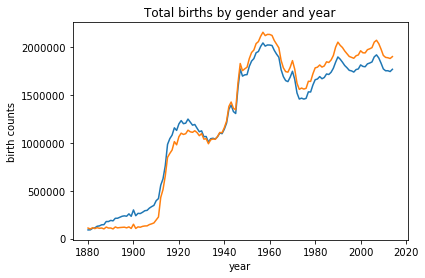

In [204]:
data = df_all.groupby(['year', 'gender'])['birth_count'].sum().sort_index().unstack()
data.columns = ['female', 'male']
plt.plot(data.index, data.values)
plt.title("Total births by gender and year")
plt.xlabel("year")
plt.ylabel("birth counts")

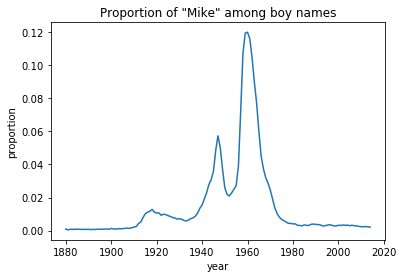

In [252]:
maleCounts = df_all.groupby(['year', 'gender'])['birth_count'].sum().unstack()['M']
mikeCounts = df_all[df_all['name'] == 'Mike'].groupby(['year']).sum()
years = mikeCounts.index
propCounts = (mikeCounts.values/maleCounts.values)[:,1]
plt.plot(years,propCounts)
plt.title('Proportion of "Mike" among boy names')
plt.xlabel('year')
plt.ylabel('proportion')

(b) Plot the proportion of the name "Mike" among all male names by year, as below.
![Portion of Mike Among Boys Names](PortionOfMikeAmongBoysNames.PNG)

## 5. Comic Characters

Let's work on a more interesting dataset. We need to download ["comic_characters.csv"](https://drive.google.com/open?id=0B1PllrCY3xLZN3ptYnlGRXhybGM) dataset. The original dataset is available at ["Comic Books Are Still Made By Men, For Men And About Men"](http://fivethirtyeight.com/features/women-in-comic-books/).

Then, we should load the dataset as we did with other datasets before, though this time we use the column "id" as the index as we load our dataframe.

In [254]:
comicCharacters = pd.DataFrame.from_csv('comic_characters.csv', index_col="id")

# publisher: Comic publisher: e.g., DC Comics or Marvel.
# name: The name of the character.
# identity: The identity statusof the character (Secret Identity, Public identity, [on marvel only: No Dual Identity]).
# align: If the character is Good, Bad or Neutral.
# eye: Eye color of the character.
# hair: Hair color of the character.
# sex: Sex of the character (e.g. Male, Female, etc.)
# alive: If the character is alive or deceased.
# appearances: The number of appareances of the character in comic books.
# first_appearance: The month and year of the character’s first appearance in a comic book, if available.
# month: The month of the character’s first appearance in a comic book, if available.
# year: The year of the character’s first appearance in a comic book, if available.
# date: The date of the character’s first appearance in a comic book, if available.

The very first thing we need to do is to simply look at the first rows of the dataset to figure out how the data looks like.

In [255]:
comicCharacters.head()

publisher                                 name          Identity  \
id                                                                    
1     Marvel            Spider-Man (Peter Parker)   Secret Identity   
2     Marvel      Captain America (Steven Rogers)   Public Identity   
3     Marvel  Wolverine (James \"Logan\" Howlett)   Public Identity   
4     Marvel    Iron Man (Anthony \"Tony\" Stark)   Public Identity   
5     Marvel                  Thor (Thor Odinson)  No Dual Identity   

                 align         eye        hair              sex  \
id                                                                
1      Good Characters  Hazel Eyes  Brown Hair  Male Characters   
2      Good Characters   Blue Eyes  White Hair  Male Characters   
3   Neutral Characters   Blue Eyes  Black Hair  Male Characters   
4      Good Characters   Blue Eyes  Black Hair  Male Characters   
5      Good Characters   Blue Eyes  Blond Hair  Male Characters   

                alive  appearances first_appearance     month    year  \
id                                                                      
1   Living Characters       4043.0     1962, August    August  1962.0   
2   Living Characters       3360.0      1941, March     March  1941.0   
3   Living Characters       3061.0    1974, October   October  1974.0   
4   Living Characters       2961.0      1963, March     March  1963.0   
5   Living Characters       2258.0   1950, November  November  1950.0   

         date  
id             
1    8/1/1962  
2    3/1/1941  
3   10/1/1974  
4    3/1/1963  
5   11/1/1950

There are two points to consider in the head of the dataframe:
* We have already defined "id" as the index.
* Compare the values in each column and the description of the column in the previous cell.

(a) What is the total number of appearances of characters for each publisher? (Note: this is not asking for the number of unique characters but the number of appearances, each character *appears* multiple times, for example Thor appears 2258 times)

In [256]:
comicCharacters.groupby('publisher')['appearances'].sum()

publisher
DC        154532.0
Marvel    260270.0
Name: appearances, dtype: float64

(b) What is the total number of appearances of characters by each publisher in each year? Output a table.

In [299]:
Marvel_Apps = comicCharacters[comicCharacters['publisher'] == 'Marvel'].groupby(['year'])['appearances'].sum()
DC_Apps = comicCharacters[comicCharacters['publisher'] == 'DC'].groupby(['year'])['appearances'].sum()
data = pd.DataFrame(data = {'Marvel': Marvel_Apps, 'DC': DC_Apps}, index=DC_Apps.index)
data

DC   Marvel
year                   
1935.0   125.0      NaN
1936.0   240.0      NaN
1937.0   458.0      NaN
1938.0  1639.0      NaN
1939.0  4067.0   1013.0
1940.0  9123.0   2160.0
1941.0  6945.0   5371.0
1942.0  4068.0    401.0
1943.0  1475.0    541.0
1944.0   274.0    960.0
1945.0   259.0    510.0
1946.0    55.0    274.0
1947.0   933.0    232.0
1948.0   673.0   1213.0
1949.0   298.0   1107.0
1950.0   459.0   2566.0
1951.0   453.0    576.0
1952.0   576.0    185.0
1953.0    10.0    429.0
1954.0   119.0    791.0
1955.0   273.0    343.0
1956.0  2470.0    288.0
1957.0   894.0     11.0
1958.0   728.0     27.0
1959.0  4224.0      8.0
1960.0  2852.0    609.0
1961.0  3142.0   8736.0
1962.0  2104.0  14724.0
1963.0  2209.0  25046.0
1964.0  1730.0  14731.0
...        ...      ...
1984.0  2596.0   4887.0
1985.0  2147.0   3415.0
1986.0  7659.0   3975.0
1987.0  7777.0   1871.0
1988.0  3940.0   3096.0
1989.0  4834.0   2890.0
1990.0  1493.0   3603.0
1991.0  1756.0   3610.0
1992.0  3181.0   3786.0
1993.0  3486.0   3054.0
1994.0  3310.0   3241.0
1995.0  1597.0   1731.0
1996.0  2042.0   1657.0
1997.0  1850.0   2038.0
1998.0  1024.0   1623.0
1999.0  2285.0    980.0
2000.0  1350.0   1578.0
2001.0   994.0   2280.0
2002.0   886.0   1962.0
2003.0  1223.0   3330.0
2004.0  1614.0   2835.0
2005.0  1222.0   3191.0
2006.0  2914.0   2434.0
2007.0  1627.0   1792.0
2008.0  1813.0   2429.0
2009.0  1378.0   1503.0
2010.0  1008.0   2233.0
2011.0   483.0   1890.0
2012.0    17.0   1072.0
2013.0     1.0   1177.0

[79 rows x 2 columns]

(c) As you can see, it is difficult to figure out any trend in appearances of characters of each publisher in each year. However, since you know data visualization, you can plot the time trend for each publisher separately and compare them. Plot a time series of appearances over time (one time series for each publisher).

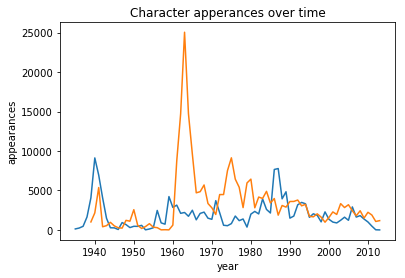

In [302]:
plt.plot(data)
plt.xlabel('year')
plt.ylabel('appearances')
plt.title('Character apperances over time')

(d) Which *hair* color has the maximum total appearances all over the years?  Produce the output as a single row from a Series.

In [312]:
comicCharacters.groupby('hair')['appearances'].sum().idxmax()

'Black Hair'

(e) Someone has given you the following lines of code. Break it down into multiple steps as we did in the lecture. Explain the function in each step and whether it processes a dataframe or series. Also if it generates a dataframe or series.

In [318]:
# returns: dataframe with female characters filtered out
c1 = comicCharacters[comicCharacters.sex == 'Male Characters']

# returns: dataframe with rows of hair types and appearance/year counts summed as cols
c2 = c1.groupby(['hair']).sum()

# returns: row of dataframe of hair type with most appearances
c3 = c2.ix[[np.argmax(c2.appearances)]]

/Users/AJGoldstein/anaconda/envs/si370/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


(f) Extra Credit: Which hair color has the biggest difference of total appearances between males and females? Produce the output as a single row from a DataFrame.

(g) Extra Credit: We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

Calculate the average number of appearances for each type of "identity" in Marvel comparing with DC? Replace all the nulls with 0s. 

(h) Extra Credit: Are there more Alive/Male characters in DC than Marvel? Do some publishers have more appearances of Living/Transgender versus Agender characters?

Produce a table that has this information (publisher/gender/living status) that shows the average number of appearances for those character types. Replace all the nulls with 0s.